# UBER RIDE ANALYSIS BETWEEN JANUARY 2014 AND AUGUST 2014

In [53]:
%pylab inline
import pandas as pd 
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Loading the Data File

In [59]:
# April 2014 Ride Data
df1 = pd.read_csv('uber-raw-data-apr14.csv')
print('April 2014 data read.')

# May 2014 Ride Data
df2 = pd.read_csv('uber-raw-data-may14.csv')
print('May 2014 data read.')

# June 2014 Ride Data
df3 = pd.read_csv('uber-raw-data-jun14.csv')
print('June 2014 data read.')

# July 2014 Ride Data
df4 = pd.read_csv('uber-raw-data-jul14.csv')
print('July 2014 data read.')

# Aug 2014 Ride Data
df5 = pd.read_csv('uber-raw-data-aug14.csv')
print('August 2014 data read.')

April 2014 data read.
May 2014 data read.
June 2014 data read.
July 2014 data read.
August 2014 data read.


In [60]:
# Concatinating all datafiles into one
df = pd.concat([df1,df2,df3,df4,df5])
df.shape

(3506191, 4)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506191 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 133.8+ MB


### Convert date time

In [64]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [65]:
dt = df['Date/Time'] # Sub-df for easy access of data/time column
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [66]:
print('Shape of the dataframe is ', df.shape)
df.info()

Shape of the dataframe is  (3506191, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506191 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    datetime64[ns]
Lat          float64
Lon          float64
Base         object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 133.8+ MB


In [67]:
# Adding "Days of the Month" with number as "dom"
def get_dom(dt):
    return dt.day

df['dom'] = df['Date/Time'].map(get_dom)

In [68]:
df.tail()

,Date/Time,Lat,Lon,Base,dom
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,31
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,31
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764,31


In [69]:
# Adding "Days of the Week" with number as "weekday"

def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

df['hour'] = df['Date/Time'].map(get_hour)

df.tail()


,Date/Time,Lat,Lon,Base,dom,weekday,hour
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,31,6,23
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,31,6,23
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764,31,6,23


## FREQUENCY ANALYSIS

#### Frequency Distribution of the Days in April 2014

Text(0.5, 1.0, 'frequency of DoM - uber= Apr 2014')

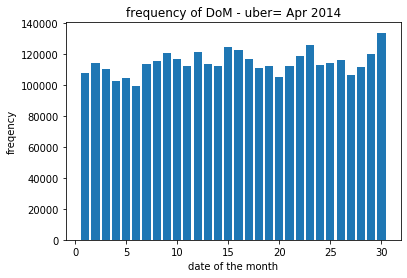

In [70]:
hist(df.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('freqency')
title('frequency of DoM - uber= Apr 2014')


In [74]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('dom').apply(count_rows)

### Frequency by Date of Month Sorted

### Hourly Analysis

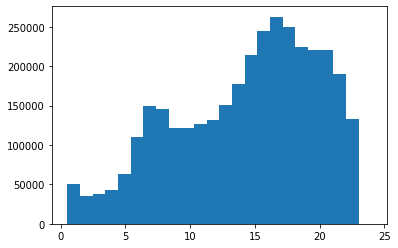

In [76]:
hist(df.hour, bins=24, range=(0.5,24));

### Weekly Analysis

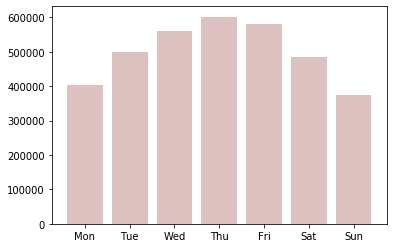

In [77]:
hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

### Ride Frequency

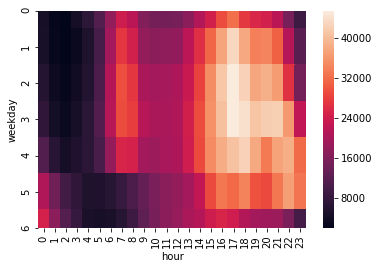

In [78]:
by_cross = df.groupby('weekday hour'.split()).apply(count_rows).unstack()
seaborn.heatmap(by_cross)

### Determining the Coordinations of the Dataset

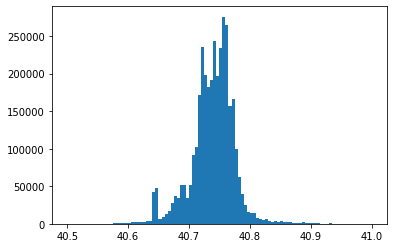

In [79]:
# Latitude Distribution of the Rides
hist(df['Lat'], bins=100, range=(40.5,41));

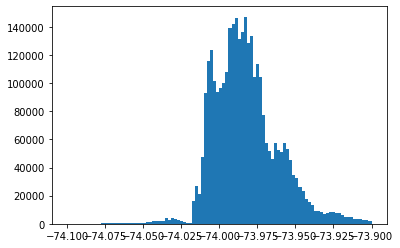

In [80]:
# Longitude Distribution of the Rides
hist(df['Lon'], bins=100, range=(-74.1, -73.9));

''

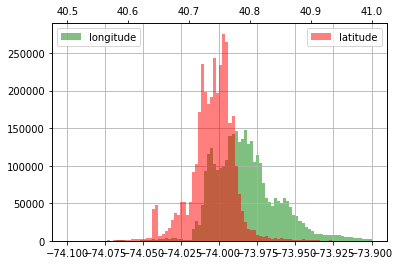

In [81]:
# Checking the distribution
hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

### Creating a map from the Trips

(40.5, 41)

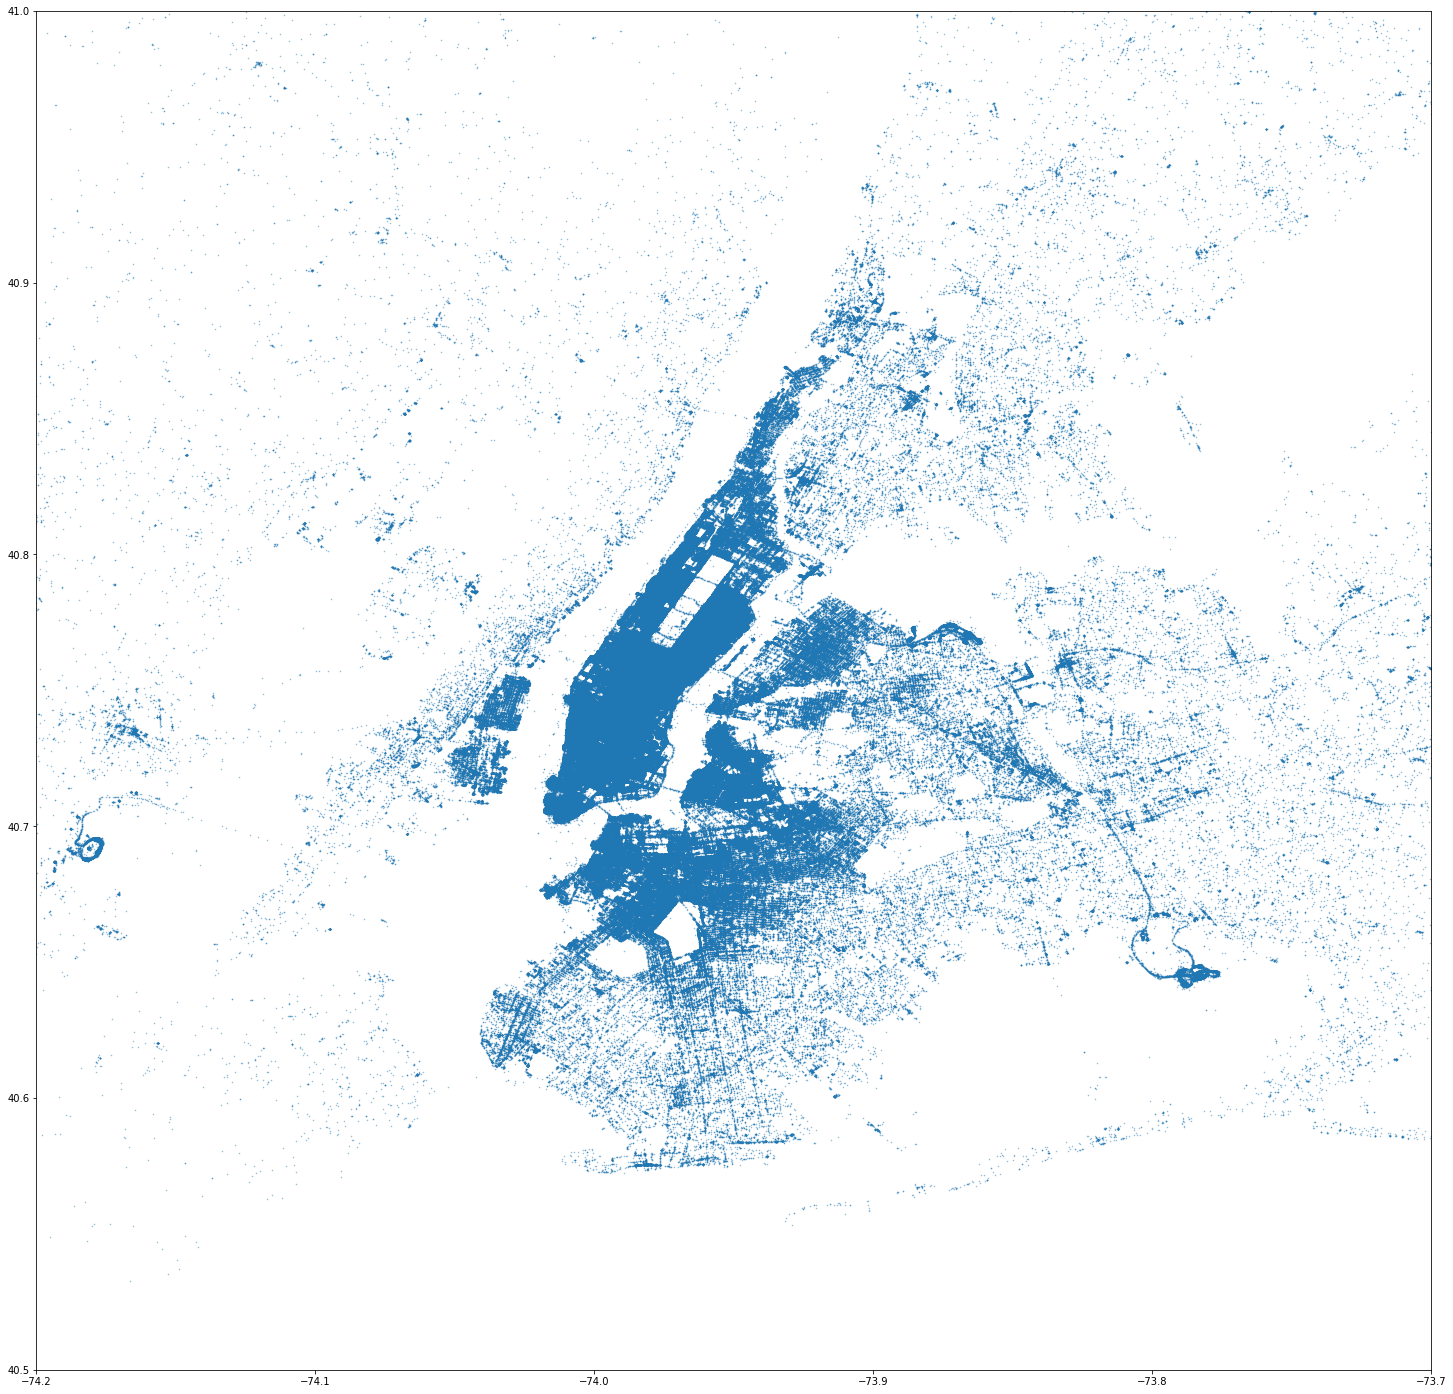

In [86]:
figure(figsize=(25, 25))
plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.5, 41)